In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests
from bs4 import BeautifulSoup

In [2]:
# pour éviter les warnings
import warnings
warnings.filterwarnings('ignore')

## Récupération des dernières informations de courses

In [6]:
print('Date du jour : {}'.format(datetime.datetime.now().strftime("%Y/%m/%d")))

Date du jour : 2020/11/30


In [7]:
r = requests.get('https://www.vendeeglobe.org/fr/classement')
r.status_code
content = r.content.decode('utf-8')
soup = BeautifulSoup(r.content)
x=soup.find_all('option',{})
result=[]
for element in x[1:]:
    result.append(element.attrs['value'])

In [8]:
def convert(x):
    s= x.split()[0]
    return s

In [9]:
def clean_vg(vg_to_clean):

    vg=vg_to_clean.copy()
    vg=vg.dropna()
    #Nettoyage de Sail:
    vg.Sail=vg.Sail.apply(lambda x:x.split('\n')[-1])

    #Création des colonnes Skipper et Crew
    vg['Skipper'] = vg['Skipper/Crew'].apply(lambda x:x.split('\n')[0])
    vg['Crew'] = vg['Skipper/Crew'].apply(lambda x:x.split('\n')[1])
    vg.pop('Skipper/Crew')

    #Création des colonnes Hour et Timezone
    vg=vg.replace({'Hour/timezone': None})
    vg['Hour/timezone']=vg['Hour/timezone'].fillna(method='ffill')
    vg['Hour'] = vg['Hour/timezone'].apply(lambda x:str(x).split()[0])
    vg['Timezone']= vg['Hour/timezone'].apply(lambda x:str(x).split()[1])
    vg.pop('Hour/timezone')

    #Néttoyage des unités
    names1=['Speed (last30)', 'VMG (last30)', 'Distance (last30)', 'Speed (lastR)', 'VMG (lastR)','Distance(lastR)', 'Speed (last24h)', 'VMG (last24h)', 'Distance(last24h)',
                       'DTF', 'DTL']
    for name in names1:
        vg[name]=vg[name].apply(lambda x:convert(x))
        
    for col in vg.columns:
        if 'Cap' in col:
            vg[col]=vg[col].apply(lambda x:x.strip('°'))

    #Création de la colonne Nationalité
    vg['Nationality']=vg.Sail.apply(lambda x:x.split()[0])
    
    
    vg['Rank']=pd.to_numeric(vg['Rank'],errors='coerce')
    for col in vg.columns[5:19]:
        vg[col]=pd.to_numeric(vg[col],errors='coerce')
    #vg=vg[1:].convert_dtypes()
    
    vg = vg.reindex(columns=['Date', 'Rank','Skipper', 'Crew', 'Sail', 'latitude', 'longitude', 'Cap heading (last30)',
       'Speed (last30)', 'VMG (last30)', 'Distance (last30)',
       'Cap heading (lastR)', 'Speed (lastR)', 'VMG (lastR)',
       'Distance(lastR)', 'Cap heading (last24h)', 'Speed (last24h)',
       'VMG (last24h)', 'Distance(last24h)', 'DTF', 'DTL', 'Hour', 'Timezone', 'Nationality'])

    return vg

## Classement le plus récent

In [10]:
file='vendeeglobe_'+result[0]+'.xlsx'
prefix="https://www.vendeeglobe.org/download-race-data/"
href=prefix+file
print(href)

https://www.vendeeglobe.org/download-race-data/vendeeglobe_20201130_140000.xlsx


In [11]:
names=['Date', 'Rank', 'Sail', 'Skipper/Crew','Hour/timezone', 'latitude','longitude', 'Cap heading (last30)', 'Speed (last30)', 'VMG (last30)', 
                        'Distance (last30)', \
                           'Cap heading (lastR)', 'Speed (lastR)', 'VMG (lastR)', \
                           'Distance(lastR)', 'Cap heading (last24h)', 'Speed (last24h)', 'VMG (last24h)', 'Distance(last24h)',
                        'DTF', 'DTL']
dtype={'Hour':str}


vg=pd.read_excel(href,sep=',',
                 header=1,
                 names=names,
                 skiprows=[0,1,2],
                 skipfooter=4,
                 )
#vg.pop('None')
vg.Date=result[0].replace('_','')
vg['Date']=pd.to_datetime(vg.Date)
vg_abandon=vg.loc[vg['Rank']=='RET']
vg=clean_vg(vg)


vg

,Date,Rank,Skipper,Crew,Sail,latitude,longitude,Cap heading (last30),Speed (last30),VMG (last30),...,Distance(lastR),Cap heading (last24h),Speed (last24h),VMG (last24h),Distance(last24h),DTF,DTL,Hour,Timezone,Nationality
0,2020-11-30 14:00:00,1,Charlie Dalin,APIVIA,FRA 79,40°06.74'S,15°33.54'E,137,17.6,15.2,...,55.6,105,14.8,14.8,356.0,17695.5,0.0,14:30,FR,FRA
1,2020-11-30 14:00:00,2,Thomas Ruyant,LinkedOut,FRA 59,40°51.18'S,09°47.35'E,111,15.2,15.2,...,50.3,109,17.1,17.1,410.4,17936.6,241.1,14:30,FR,FRA
2,2020-11-30 14:00:00,3,Kevin Escoffier,PRB,FRA 85,40°54.62'S,09°10.53'E,123,17.1,16.3,...,50.7,102,18.2,18.0,437.6,17962.5,267.0,14:30,FR,FRA
3,2020-11-30 14:00:00,4,Jean Le Cam,Yes we Cam !,FRA 01,40°42.04'S,08°38.54'E,125,17.1,16.2,...,48.8,108,16.9,16.8,405.0,17989.2,293.8,14:30,FR,FRA
4,2020-11-30 14:00:00,5,Louis Burton,Bureau Vallée 2,FRA 18,44°02.73'S,06°55.15'E,95,20.4,20.3,...,60.7,106,18.2,18.2,437.4,18017.0,321.5,14:30,FR,FRA
5,2020-11-30 14:00:00,6,Yannick Bestaven,Maître Coq IV,FRA 17,41°02.65'S,07°48.67'E,126,17.5,16.4,...,51.7,113,17.6,17.6,423.1,18019.8,324.3,14:30,FR,FRA
6,2020-11-30 14:00:00,7,Sébastien Simon,ARKEA PAPREC,FRA 4,41°13.62'S,07°01.87'E,112,15.0,14.9,...,48.0,113,17.3,17.3,416.2,18050.7,355.2,14:30,FR,FRA
7,2020-11-30 14:00:00,8,Boris Herrmann,Seaexplorer - Yacht Club De Monaco,MON 10,40°43.28'S,06°29.46'E,116,18.0,17.8,...,53.3,109,17.1,17.1,410.0,18082.7,387.3,14:30,FR,MON
8,2020-11-30 14:00:00,9,Damien Seguin,Groupe APICIL,FRA 1000,42°08.65'S,04°23.43'E,90,17.6,17.1,...,53.5,104,17.2,17.1,413.0,18150.3,454.8,14:30,FR,FRA
9,2020-11-30 14:00:00,10,Giancarlo Pedote,Prysmian Group,ITA 34,42°33.44'S,02°57.40'E,94,17.4,17.1,...,53.5,108,17.1,17.0,409.2,18205.4,510.0,14:30,FR,ITA


## Abandon

In [12]:
vg_abandon

,Date,Rank,Sail,Skipper/Crew,Hour/timezone,latitude,longitude,Cap heading (last30),Speed (last30),VMG (last30),...,Cap heading (lastR),Speed (lastR),VMG (lastR),Distance(lastR),Cap heading (last24h),Speed (last24h),VMG (last24h),Distance(last24h),DTF,DTL
32,2020-11-30 14:00:00,RET,\nFRA 6,Nicolas Troussel\nCORUM L'Épargne,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Quick Overview

In [13]:
import re

def gps_lat_conv(lat):
    deg, minutes, seconds, direction =  re.split('[°.\'"]', lat)
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['S'] else 1)

def gps_lon_conv(lon):
    deg, minutes, seconds, direction =  re.split('[°.\'"]', lon)
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W'] else 1)

In [128]:
from datetime import datetime, timedelta
from ipyleaflet import *
from random import uniform


Lead = AwesomeIcon(
    name='leaf',
    marker_color='darkred',
    icon_color='black',
    spin=False
)

Followers=AwesomeIcon(
    name='circle',
    marker_color='darkblue',
    icon_color='lightblue',
    spin=False
)


markers=[]
for i in vg['Skipper']:
    if vg['Rank'].loc[vg['Skipper']==i].values[0]==1:
        icon=Lead
    else:
        icon=Followers
    lat=gps_lat_conv(vg['latitude'].loc[vg['Skipper']==i].values[0])
    lon=gps_lon_conv(vg['longitude'].loc[vg['Skipper']==i].values[0])
    markers.append(Marker(location=(lat,lon),title=i,icon=icon,drageable=False, icon_color='darkblue'))
marker_cluster = MarkerCluster(
    markers=markers)

In [15]:
lat=gps_lat_conv(vg['latitude'][0])
lon=gps_lon_conv(vg['longitude'][0])


vendée1=basemap_to_tiles(basemaps.Esri.NatGeoWorldMap)
vendée2 = basemap_to_tiles(basemaps.Esri.WorldImagery)
m = Map(layers=(vendée2,vendée1), center=(lat, lon), zoom=3)

#Icons
m.add_layer(marker_cluster)

#Moyen de contrôle
control = LayersControl(position='topright')
m.add_control(control)
m.add_control(FullScreenControl())

#Moyen de mesure
measure = MeasureControl(
    position='topleft',
    active_color = 'orange',
    primary_length_unit = 'kilometers'
)
m.add_control(measure)

measure.completed_color = 'blue'

measure.add_length_unit('yards', 1.09361, 4)
measure.secondary_length_unit = 'yards'

measure.add_area_unit('sqyards', 1.19599, 4)
measure.secondary_area_unit = 'sqyards'

m

Map(center=[-40.120555555555555, 15.565000000000001], controls=(ZoomControl(options=['position', 'zoom_in_text…

## Téléchargement des caractéristiques des bateaux

In [16]:
r_glo = requests.get('https://www.vendeeglobe.org/fr/glossaire')
r_glo.status_code
content = r_glo.content.decode('utf-8')
glo = BeautifulSoup(r_glo.content)
skip=glo.find_all('div', {'class': "boats-list__infos"})
boat=glo.find_all('div', {'class': "boats-list__popup-infos"})

In [17]:
#Création d'un dataframe des caractéristiques des bateaux

table_boat=[]
for i in boat:
    row_boat={}
    row_boat['Crew']=i.find('h3',{'class':"boats-list__popup-title"}).text
    li_all=i.find_all('li')
    for j in li_all:
        row_boat[j.text.split(':')[0]]=j.text.split(':')[1]
    table_boat.append(row_boat)
Boat_char=pd.DataFrame(table_boat)

#Création d'un dataframe Skipper
table=[]
for i in skip:
    row={}
    row['Crew']=i.find('h3',{'class':"boats-list__boat-name"}).text
    row['Skipper']=i.find('span',{'class':"boats-list__skipper-name"}).text
    table.append(row)
Skipper=pd.DataFrame(table)
Skipper['Skipper']=Skipper['Skipper'].apply(lambda x:' '.join(part.capitalize() for part in x.split()))

In [18]:
#Création dataframe mergé
Boat = pd.merge(Skipper,
              Boat_char,
              left_on='Crew',
              right_on='Crew',
              how='left')

#Nettoyage du dataframe 
def del_unite(x,unite):
    return x.split(str(unite))[0].replace(' ','').replace(',','.')

Boat.columns=list(' '.join(i.split()) for i in Boat.columns[0:7]) + ['Longueur (m)', 'Largeur (m)','Tirant d\'eau (m)', 'Déplacement (t)','Nombre de dérives','Hauteur mât (m)','Voile quille','Surface de voiles au près (m²)','Surface de voiles au portant (m²)']
Boat['Longueur (m)']=Boat['Longueur (m)'].apply(lambda x: del_unite(x,'m'))
Boat['Longueur (m)']=pd.to_numeric(Boat['Longueur (m)'], errors ='coerce')
Boat['Largeur (m)']=Boat['Largeur (m)'].apply(lambda x: del_unite(x,'m'))
Boat['Largeur (m)']=pd.to_numeric(Boat['Largeur (m)'], errors ='coerce')
Boat['Tirant d\'eau (m)']=Boat['Tirant d\'eau (m)'].apply(lambda x: del_unite(x,'m'))
Boat['Tirant d\'eau (m)']=pd.to_numeric(Boat['Tirant d\'eau (m)'], errors ='coerce')
Boat['Hauteur mât (m)']=Boat['Hauteur mât (m)'].apply(lambda x: del_unite(x,'m'))
Boat['Hauteur mât (m)']=pd.to_numeric(Boat['Hauteur mât (m)'], errors ='coerce')
Boat['Déplacement (t)']=Boat['Déplacement (t)'].apply(lambda x: del_unite(x,'t'))
Boat['Déplacement (t)']=pd.to_numeric(Boat['Déplacement (t)'], errors ='coerce')
Boat['Surface de voiles au près (m²)']=Boat['Surface de voiles au près (m²)'].apply(lambda x: del_unite(x,'m2'))
Boat['Surface de voiles au près (m²)']=pd.to_numeric(Boat['Surface de voiles au près (m²)'], errors ='coerce')
Boat['Surface de voiles au portant (m²)']=Boat['Surface de voiles au portant (m²)'].apply(lambda x: del_unite(x,'m2'))
Boat['Surface de voiles au portant (m²)']=pd.to_numeric(Boat['Surface de voiles au portant (m²)'], errors ='coerce')

Boat['Date de lancement']=Boat['Date de lancement'].apply(lambda x: x.strip())
Boat['Année de lancement']=Boat['Date de lancement'].apply(lambda x: x.split()[2])
Boat['Nombre de dérives']=Boat['Nombre de dérives'].apply(lambda x: x.replace('foiler','foils'))
Boat['Nombre de dérives']=Boat['Nombre de dérives'].apply(lambda x: x.replace('2','Dérives'))
Boat['Nombre de dérives']=Boat['Nombre de dérives'].apply(lambda x: x.strip())
Boat['Voile quille']=Boat['Voile quille'].apply(lambda x: str(x).lower())
Boat.loc[Boat['Voile quille'].str.contains('basculante'),'Voile quille']='basculante'
Boat.rename(columns={'Numéro de voile': 'Sail'}, inplace=True)

#Affichage du dataframe
Boat.head()

,Crew,Skipper,Sail,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (t),Nombre de dérives,Hauteur mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²),Année de lancement
0,NEWREST - ART & FENÊTRES,Fabrice Amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,2015
1,PURE - Best Western®,Romain Attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,18.28,5.80,4.5,9.0,Dérives,28.0,acier forgé,280.0,560.0,2007
2,TSE - 4MYPLANET,Alexia Barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeu...",Marc Lombard,MAG France,01 Mars 1998,18.28,5.54,4.5,9.0,Dérives,29.0,acier,260.0,580.0,1998
3,Maître CoQ IV,Yannick Bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,2015
4,CHARAL,Jérémie Beyou,08,NaN,VPLP,CDK Technologies,18 Août 2018,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,2018


In [19]:
#copy d'un dataframe et créations de quelques colonnes features. Préparation de merge
Boat_c=Boat.copy()
Boat_c = Boat_c.drop(['Sail', 'Crew','Anciens noms du bateau'], axis=1)
Boat_c

,Skipper,Architecte,Chantier,Date de lancement,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (t),Nombre de dérives,Hauteur mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²),Année de lancement
0,Fabrice Amedeo,VPLP/Verdier,Persico Marine,01 Août 2015,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,2015
1,Romain Attanasio,Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,18.28,5.80,4.5,9.0,Dérives,28.0,acier forgé,280.0,560.0,2007
2,Alexia Barrier,Marc Lombard,MAG France,01 Mars 1998,18.28,5.54,4.5,9.0,Dérives,29.0,acier,260.0,580.0,1998
3,Yannick Bestaven,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,2015
4,Jérémie Beyou,VPLP,CDK Technologies,18 Août 2018,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,2018
5,Arnaud Boissières,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,18.28,5.65,4.5,7.9,foils,29.0,basculante,NaN,NaN,2007
6,Louis Burton,Verdier - VPLP,CDK Technologies,09 Juin 2015,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,2015
7,Didac Costa,Owen Clarke Design,Martens Yachts,02 Février 2000,18.28,5.30,4.5,8.9,Dérives,26.0,acier,240.0,470.0,2000
8,Manuel Cousin,Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,18.28,5.80,4.5,9.0,Dérives asymétriques,28.5,basculante,270.0,560.0,2007
9,Clarisse Cremer,Verdier - VPLP,CDK - Mer Agitée,01 Mars 2011,18.28,5.70,4.5,7.7,Dérives,29.0,acier forgé,340.0,570.0,2011


In [20]:
#A noter quelques valeurs manquantes
Boat_c.loc[Boat_c.isna().any(axis=1)]

,Skipper,Architecte,Chantier,Date de lancement,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (t),Nombre de dérives,Hauteur mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²),Année de lancement
5,Arnaud Boissières,Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,18.28,5.65,4.5,7.9,foils,29.0,basculante,NaN,NaN,2007
14,Kevin Escoffier,Verdier - VPLP,CDK Technologies,08 Mars 2010,18.28,5.50,4.5,NaN,foils,27.4,acier mécano soudé,300.0,600.0,2010
24,Alan Roura,Groupe Finot-Conq,Multiplast,01 Août 2007,18.28,5.90,4.5,NaN,foils,27.0,carbone,290.0,580.0,2007


## Création du dataset Total

In [21]:
def vg_df(inter):
    names=['Date', 'Rank', 'Sail', 'Skipper/Crew','Hour/timezone', 'latitude','longitude', 'Cap heading (last30)', 'Speed (last30)', 'VMG (last30)', 
                        'Distance (last30)', \
                           'Cap heading (lastR)', 'Speed (lastR)', 'VMG (lastR)', \
                           'Distance(lastR)', 'Cap heading (last24h)', 'Speed (last24h)', 'VMG (last24h)', 'Distance(last24h)',
                        'DTF', 'DTL']
    href=prefix+'vendeeglobe_'+inter+'.xlsx'
    vg=pd.read_excel(href,sep=',',
                 header=1,
                 names=names,
                 skiprows=[0,1,2],
                 skipfooter=4,
                 )
    vg.Date=inter.replace('_','')
    vg['Date']=pd.to_datetime(vg.Date)
    return vg

In [22]:
def convert(x):
    s= x.split()[0]
    return s

In [23]:
vg_full = pd.DataFrame(columns=names)
for inter in result:
    vg_full=vg_full.append(vg_df(inter),ignore_index=True)
vg_full=clean_vg(vg_full)
vg_full = vg_full.drop(['Cap heading (last24h)', 'Speed (last24h)', 'VMG (last24h)', 'Distance(last24h)'], axis=1)
vg_full

,Date,Rank,Skipper,Crew,Sail,latitude,longitude,Cap heading (last30),Speed (last30),VMG (last30),Distance (last30),Cap heading (lastR),Speed (lastR),VMG (lastR),Distance(lastR),DTF,DTL,Hour,Timezone,Nationality
0,2020-11-30 14:00:00,1,Charlie Dalin,APIVIA,FRA 79,40°06.74'S,15°33.54'E,137,17.6,15.2,8.8,135,18.5,16.4,55.6,17695.5,0.0,14:30,FR,FRA
1,2020-11-30 14:00:00,2,Thomas Ruyant,LinkedOut,FRA 59,40°51.18'S,09°47.35'E,111,15.2,15.2,7.6,109,16.8,16.8,50.3,17936.6,241.1,14:30,FR,FRA
2,2020-11-30 14:00:00,3,Kevin Escoffier,PRB,FRA 85,40°54.62'S,09°10.53'E,123,17.1,16.3,8.5,117,16.9,16.6,50.7,17962.5,267.0,14:30,FR,FRA
3,2020-11-30 14:00:00,4,Jean Le Cam,Yes we Cam !,FRA 01,40°42.04'S,08°38.54'E,125,17.1,16.2,8.6,118,16.3,16.0,48.8,17989.2,293.8,14:30,FR,FRA
4,2020-11-30 14:00:00,5,Louis Burton,Bureau Vallée 2,FRA 18,44°02.73'S,06°55.15'E,95,20.4,20.3,10.2,97,20.2,20.2,60.7,18017.0,321.5,14:30,FR,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,2020-11-08 14:00:00,27,Alexia Barrier,TSE - 4myplanet,FRA 72,46°25.83'N,01°48.92'W,236,10.9,10.8,0.2,357,0.0,0.0,2789.4,24295.4,1.6,15:30,FR,FRA
4416,2020-11-08 14:00:00,28,Isabelle Joschke,MACSF,FRA 27,46°24.98'N,01°48.22'W,238,13.8,13.5,0.2,358,0.0,0.0,2788.5,24295.5,1.6,15:26,FR,FRA
4417,2020-11-08 14:00:00,29,Sébastien Simon,ARKEA PAPREC,FRA 4,46°25.75'N,01°48.73'W,235,13.4,13.4,0.7,357,0.0,0.0,2789.3,24295.5,1.6,15:29,FR,FRA
4418,2020-11-08 14:00:00,30,Miranda Merron,Campagne de France,FRA 50,46°25.39'N,01°48.34'W,237,11.4,11.3,0.4,358,0.0,0.0,2788.9,24295.6,1.7,15:28,FR,FRA


## Affichage des trajectoires et infos récentes de courses

In [24]:
a=vg_full.groupby(['Skipper','Date']).agg({'latitude':'first','longitude':'first'})
a['latitude']=a['latitude'].apply(lambda x: gps_lat_conv(x))
a['longitude']=a['longitude'].apply(lambda x: gps_lon_conv(x))

#Calul des trajectoires
path=[]
for i in a.index.levels[0]:
    dic={}
    dic={'name':i,
         'locations':a.loc[i].to_numpy().tolist()}
    path.append(dic)

#Calcul des dernières informations de vitesses
b=vg_full.groupby(['Skipper']).agg('first')
info={}
for i in range(len(b)):
    #info={}
    info[b.index[i]]={'Rank':b.iloc[i]['Rank'],
                     'Speed':b.iloc[i]['Speed (last30)'],
                     'VMG':b.iloc[i]['VMG (last30)'],
                     'Cap':b.iloc[i]['Cap heading (last30)']}
    #infos.append(info)

In [25]:
from ipywidgets import HTML
from ipyleaflet import AntPath, Polyline, Popup

import random
#Création de couleurs différentes
number_of_colors = len(path)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

#Tracage des polylignes
idx=0
for elem in path:
    m.add_layer(Polyline(locations=elem['locations'],color= color[idx],fill=False,opacity=0.5,weight=3))
    idx+=1

#Affichage des informations récentes calculées
for i in markers:
    message =HTML()
    idx=i.title
    message.value = "<b>Skipper :</b> {} <li><b>Rank :</b> {} <li><b>Speed :</b> {} <li><b>VMG :</b> {} <li><b>Cap :</b> {}"\
    .format(idx,info[idx]['Rank'],info[idx]['Speed'],info[idx]['VMG'], info[idx]['Cap'])
    i.popup=message

m

Map(bottom=1474.0, center=[-40.120555555555555, 15.565000000000001], controls=(ZoomControl(options=['position'…

Nota: Ne pas hésiter à se balader, mettre en plein écran, clicker sur les icones ou encore à mesurer la distance entre les bateaux si nécessaire.

## Analyse High Level

In [26]:
#Calcul des vitesses par skipper
vg_full.groupby('Skipper').agg({'Rank':'first','Speed (lastR)':['mean','var','max'],\
                               'VMG (lastR)':['mean','var','max'],\
                               'DTF':'sum'}).sort_values(by=('Rank','first'))

Rank Speed (lastR)                  VMG (lastR)  \
                     first          mean        var   max        mean   
Skipper                                                                 
Charlie Dalin            1     15.162406  23.351455  23.4   12.984211   
Thomas Ruyant            2     14.276866  30.426604  23.9   12.353731   
Kevin Escoffier          3     14.431343  19.091943  21.4   12.461940   
Jean Le Cam              4     13.515672  14.958925  19.1   12.233582   
Louis Burton             5     14.575373  20.054652  21.7   12.500746   
Yannick Bestaven         6     14.167164  18.158162  21.6   12.383582   
Sébastien Simon          7     14.580597  23.876012  22.6   12.476866   
Boris Herrmann           8     14.240299  19.990244  22.6   12.407463   
Damien Seguin            9     13.630597  13.093267  21.1   12.113433   
Giancarlo Pedote        10     13.717910  16.130203  20.2   12.021642   
Benjamin Dutreux        11     13.482836  10.582485  20.6   11.935821   
Samantha Davies         12     14.085821  14.871903  21.6   11.930597   
Nicolas Troussel        12     12.738000  21.383220  22.9    9.888000   
Isabelle Joschke        13     13.334328  16.157910  21.6   11.818657   
Maxime Sorel            14     13.172388   9.745472  19.2   11.712687   
Alex Thomson            15     13.601493  29.381050  22.3   11.573881   
Romain Attanasio        16     12.901493   6.824509  17.7   11.369403   
Clarisse Cremer         17     12.833582   8.654879  18.8   11.214179   
Alan Roura              18     12.246269  10.856941  19.3   10.547015   
Stéphane Le Diraison    19     11.579851   9.340418  20.1    9.973134   
Arnaud Boissieres       20     10.654962  15.555110  17.2    8.819084   
Armel Tripon            21     11.742537  20.910433  23.6    8.876866   
Manuel Cousin           22     10.738060  10.880871  16.1    8.760448   
Didac Costa             23     10.400746  10.559774  16.2    8.685075   
Pip Hare                24     10.530597   9.851312  15.9    8.496269   
Fabrice Amedeo          25     10.008209  25.843616  18.0    8.180597   
Clément Giraud          26      9.534328  12.085279  14.9    7.888060   
Alexia Barrier          27      9.395522  11.590656  15.7    7.864179   
Miranda Merron          28      9.358209  12.817789  16.4    7.751493   
Ari Huusela             29      9.017910  11.325391  14.4    7.460448   
Kojiro Shiraishi        30      9.109701  17.593514  22.1    7.335821   
Sébastien Destremau     31      8.698507  11.774885  15.9    7.378358   
Jérémie Beyou           32     10.198507  30.331727  23.7    6.491045   

                                             DTF  
                            var   max        sum  
Skipper                                           
Charlie Dalin         28.914067  23.3  2799456.5  
Thomas Ruyant         36.961001  22.5  2829440.7  
Kevin Escoffier       28.675157  20.0  2847586.0  
Jean Le Cam           20.170819  19.0  2840364.1  
Louis Burton          32.582781  21.5  2855867.2  
Yannick Bestaven      26.315518  19.7  2853072.7  
Sébastien Simon       31.335325  20.9  2858735.1  
Boris Herrmann        28.708215  20.6  2854144.9  
Damien Seguin         17.397563  19.9  2867666.3  
Giancarlo Pedote      22.514491  20.1  2876084.8  
Benjamin Dutreux      16.333143  19.5  2865480.7  
Samantha Davies       25.720034  20.9  2860714.4  
Nicolas Troussel      28.908833  20.0  1171425.5  
Isabelle Joschke      21.016567  20.2  2888070.3  
Maxime Sorel          14.678259  18.4  2880125.0  
Alex Thomson          38.205704  22.0  2847831.4  
Romain Attanasio      10.165297  16.7  2890989.5  
Clarisse Cremer       13.800173  17.5  2896534.0  
Alan Roura            14.331532  17.3  2902594.6  
Stéphane Le Diraison  11.578972  18.6  2921909.1  
Arnaud Boissieres     14.187248  17.1  2891342.2  
Armel Tripon          21.941792  20.0  2985882.5  
Manuel Cousin          9.454890  15.5  2967860.0  
Didac Costa            9.808648  14.8  2964351.8  
Pip Hare        

<Figure size 720x360 with 0 Axes>

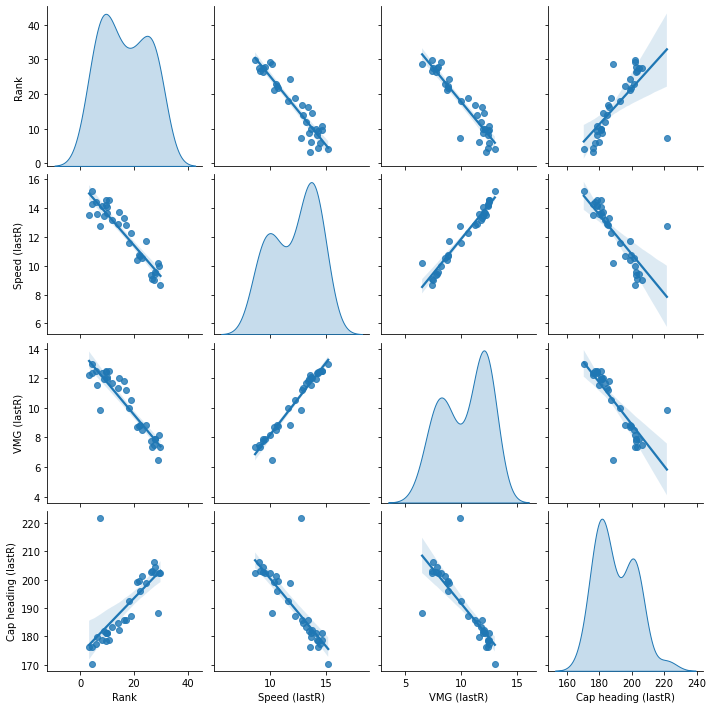

In [27]:
#Analyse high level : corrélation rang - vitesse
import seaborn as sns
Corr1=vg_full.groupby('Skipper').agg({'Rank':'mean','Speed (lastR)':'mean',\
                               'VMG (lastR)':'mean','Cap heading (lastR)':'mean'})

fig = plt.figure(figsize=(10, 5))
sns.pairplot(Corr1,diag_kind="kde",kind="reg",palette="husl");
plt.show()

## Analyse plus poussée intégrant les caractéristiques de bateaux

### Merge des datasets de caractéristiques bateaux et Skippers

In [29]:
vg_boat = pd.merge(vg_full,
              Boat_c,
              left_on='Skipper',
              right_on='Skipper',
              how='outer')
vg_boat=vg_boat.dropna(subset=['Date'])
vg_boat.head()

,Date,Rank,Skipper,Crew,Sail,latitude,longitude,Cap heading (last30),Speed (last30),VMG (last30),...,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (t),Nombre de dérives,Hauteur mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²),Année de lancement
0,2020-11-30 14:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,40°06.74'S,15°33.54'E,137.0,17.6,15.2,...,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0,2019
1,2020-11-30 11:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,39°26.92'S,14°43.07'E,119.0,17.4,17.1,...,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0,2019
2,2020-11-30 08:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,38°54.89'S,13°39.62'E,127.0,20.6,19.6,...,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0,2019
3,2020-11-30 04:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,38°16.93'S,12°29.86'E,119.0,17.8,17.7,...,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0,2019
4,2020-11-29 21:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,37°34.38'S,10°21.88'E,55.0,18.0,9.8,...,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0,2019


### Graphique des vitesses des bateaux

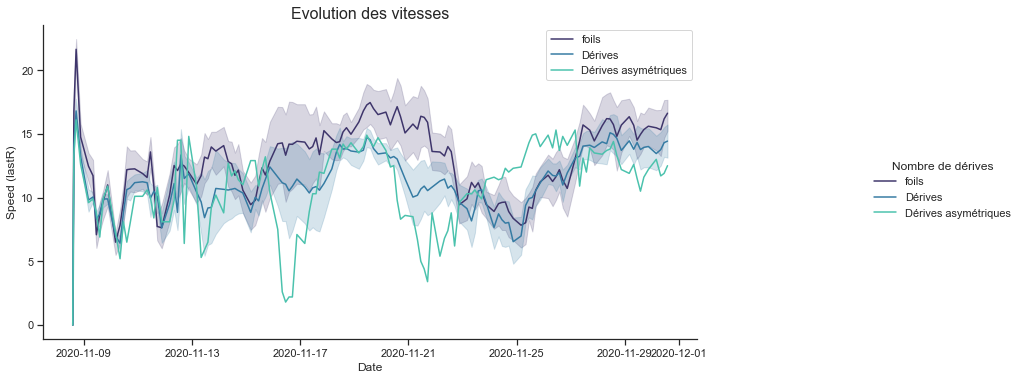

In [30]:
#Affichage des vitesses 
sns.set_theme(style="ticks")
g=sns.relplot(data=vg_boat, x='Date', y='Speed (lastR)', kind="line",hue='Nombre de dérives',palette='mako')
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
plt.title("Evolution des vitesses",size=16)
plt.legend()
plt.show()

In [31]:
#Calcul des vitesses moyennes par type de dérives
tab = vg_boat.pivot_table(values='Speed (lastR)',
                          index='Date',
                          columns='Nombre de dérives',
                          aggfunc='mean')

print(tab.mean())

Nombre de dérives
Dérives                 11.267107
Dérives asymétriques    10.738060
foils                   12.953572
dtype: float64


#### Vitesses des bateaux en fonctions de la technologie des dérives et des quilles

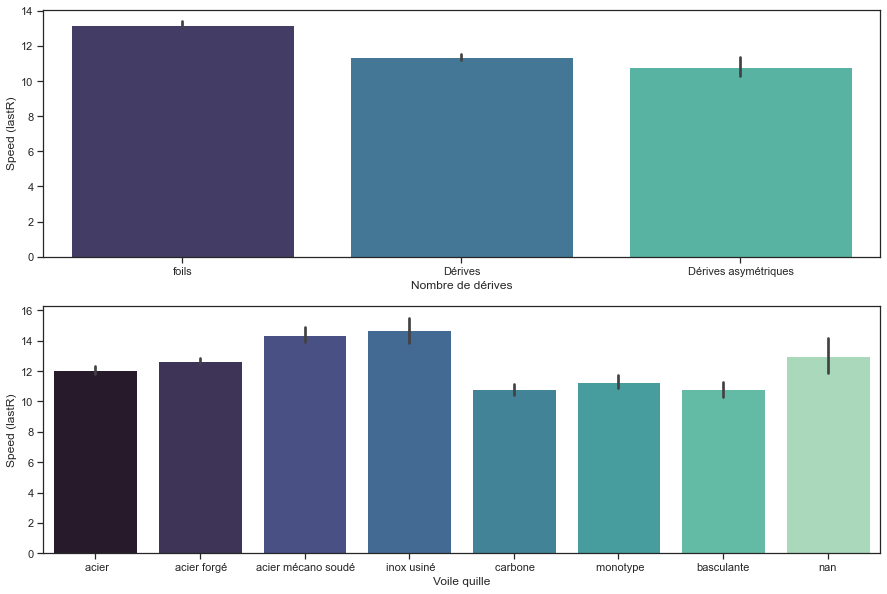

In [89]:
f=plt.figure(figsize=(15, 10))

gs = f.add_gridspec(2, 1) 

ax = f.add_subplot(gs[0, 0])
sns.set_theme(style="ticks")
sns.barplot(data=vg_boat, x='Nombre de dérives', y='Speed (lastR)', palette='mako');

ax = f.add_subplot(gs[1, 0])
sns.set_theme(style="ticks")
sns.barplot(data=vg_boat, x='Voile quille', y='Speed (lastR)', palette='mako');

#### les surfaces des voiles au près? Au portant?

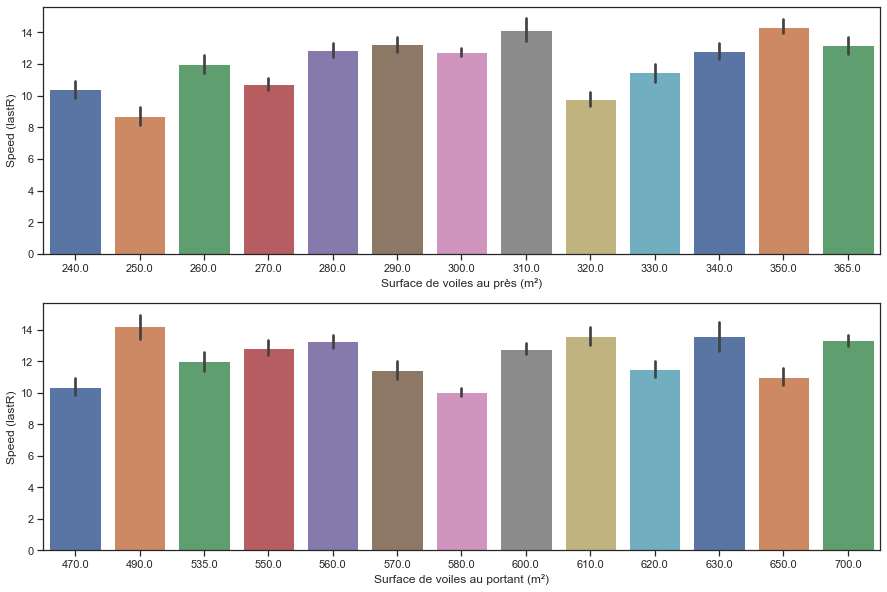

In [33]:
f=plt.figure(figsize=(15, 10))
gs = f.add_gridspec(2, 1) 

ax = f.add_subplot(gs[0, 0])
sns.set_theme(style="ticks")
sns.barplot(data=vg_boat, x='Surface de voiles au près (m²)', y='Speed (lastR)', palette='deep');

ax = f.add_subplot(gs[1, 0])
sns.set_theme(style="ticks")
sns.barplot(data=vg_boat, x='Surface de voiles au portant (m²)', y='Speed (lastR)', palette='deep');

Les foils ont clairement un impact sur la performance. Pour le reste cela reste difficile à dire graphiquement

### Création d'un dataset complet orienté features

In [90]:
ind=vg_boat.loc[vg_boat['Speed (lastR)']==0].index
vg_boat=vg_boat.drop(index=ind)
vg_boat_f=pd.get_dummies(vg_boat,columns=['Nombre de dérives','Voile quille'],prefix=['type','quille'])
vg_boat_f=vg_boat_f.dropna()
vg_boat_f.head()

,Date,Rank,Skipper,Crew,Sail,latitude,longitude,Cap heading (last30),Speed (last30),VMG (last30),...,type_Dérives asymétriques,type_foils,quille_ acier,quille_ acier forgé,quille_ acier mécano soudé,quille_ carbone,quille_ inox usiné,quille_ monotype,quille_basculante,quille_nan
0,2020-11-30 14:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,40°06.74'S,15°33.54'E,137.0,17.6,15.2,...,0,1,1,0,0,0,0,0,0,0
1,2020-11-30 11:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,39°26.92'S,14°43.07'E,119.0,17.4,17.1,...,0,1,1,0,0,0,0,0,0,0
2,2020-11-30 08:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,38°54.89'S,13°39.62'E,127.0,20.6,19.6,...,0,1,1,0,0,0,0,0,0,0
3,2020-11-30 04:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,38°16.93'S,12°29.86'E,119.0,17.8,17.7,...,0,1,1,0,0,0,0,0,0,0
4,2020-11-29 21:00:00,1.0,Charlie Dalin,APIVIA,FRA 79,37°34.38'S,10°21.88'E,55.0,18.0,9.8,...,0,1,1,0,0,0,0,0,0,0


### Analyse visuelles des corrélations

<Figure size 720x360 with 0 Axes>

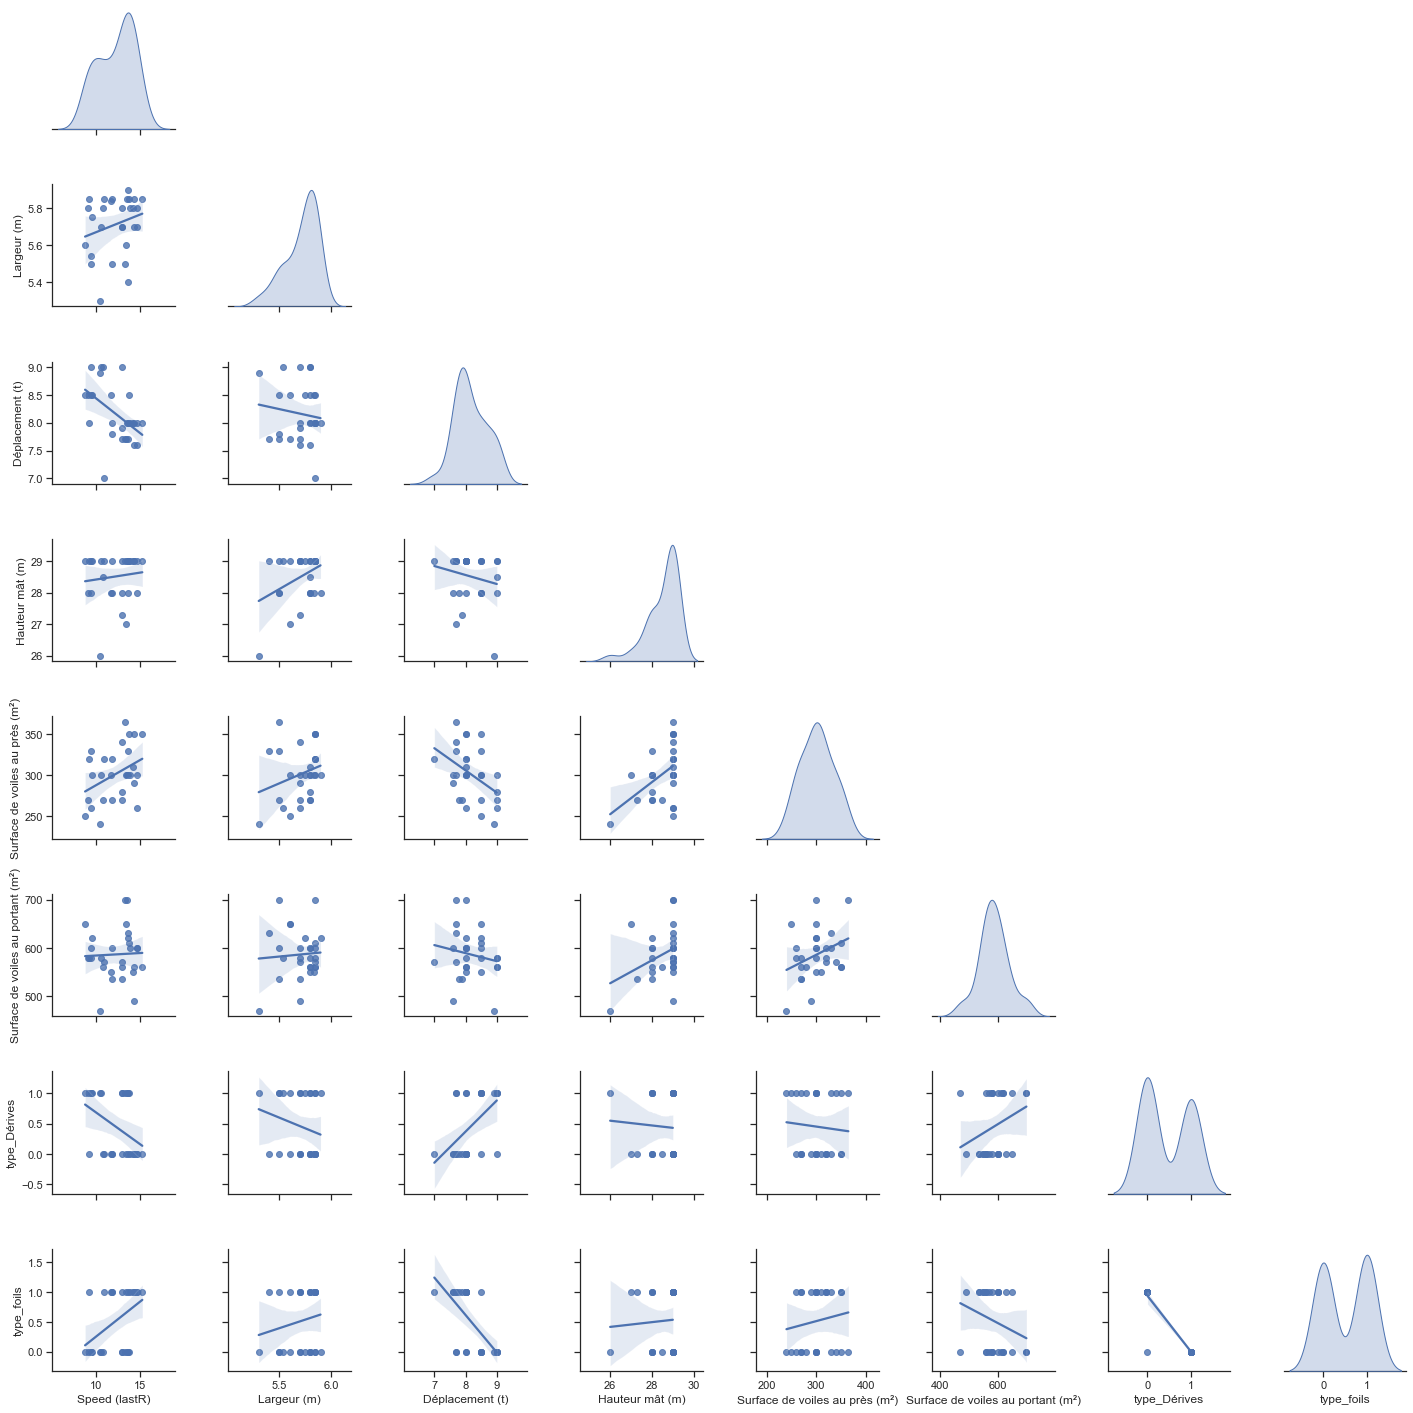

In [91]:
#Analyse low level des corrélations rang - vitesse
Corr=vg_boat_f.groupby('Skipper').agg({'Speed (lastR)':'mean',\
                                     'Largeur (m)':'first','Déplacement (t)':'first',\
                                    'Hauteur mât (m)':'first','Surface de voiles au près (m²)':'first',\
                                    'Surface de voiles au portant (m²)':'first','type_Dérives':'first','type_foils':'first'})

fig = plt.figure(figsize=(10, 5))
sns.pairplot(Corr,diag_kind="kde",kind="reg",palette="husl",corner=True);
#hue='Nombre de dérives'
plt.show()

Ce schéma permet de mettre en relief les corrélations entre quelques variables explicatives.

Bien qu'il manque de la variabilité  pour certaines variables explicatives on constate des choses intérressantes:

- La vitesse augmente avec la surface de voiles au près mais à contrario la surface de voiles au portant n'affecte que faiblement la vitesse. Les deux voiles ont certainement un rôle différent.

- La vitesse moyenne croit avec la présence de foils et décroit dans le cas contraire (information déja relevée précedemment).

- Le déplacement en tonne réduit la vitesse du bateau; ce qui est logique car cela correspond à la partie immergée du bateau 

- Surtout, on constate une corrélation entre le déplacement en tonnes du bateau et le type dérives (foils ou dérives). Celui ci diminue avec les foils. Ce qui semble logique les foils ont été concus pour surélever le bateau, diminuer la partie immergée et ainsi réduire la trainée

<Figure size 720x360 with 0 Axes>

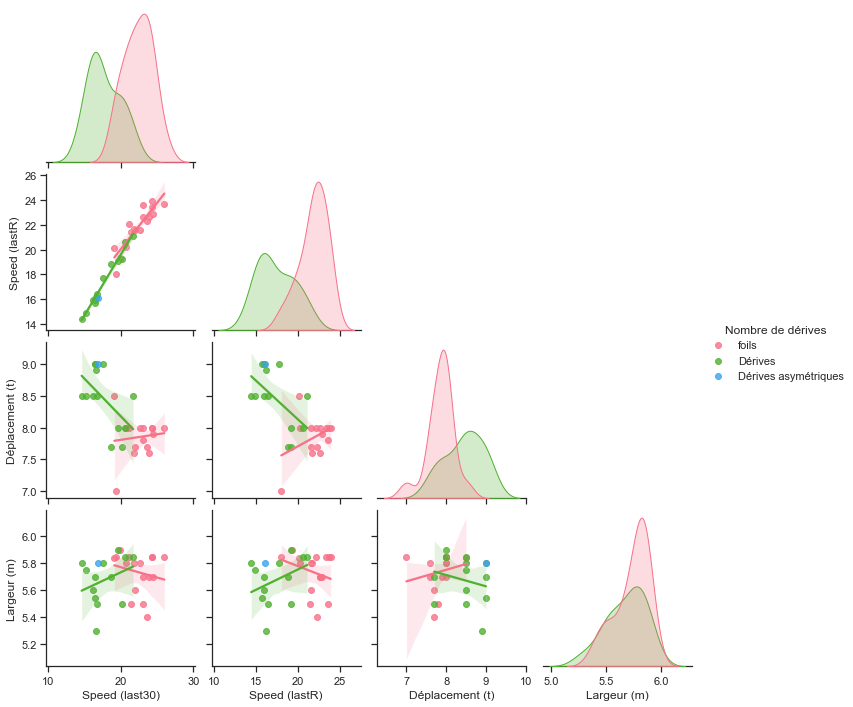

In [92]:
#Analyse low level des corrélations rang - vitesse
Corr=vg_boat.groupby('Skipper').agg({'Speed (last30)':'max','Speed (lastR)':'max',\
                                     'Déplacement (t)':'first','Largeur (m)':'first',\
                                    'Nombre de dérives':'first'})

fig = plt.figure(figsize=(10, 5))
sns.pairplot(Corr,diag_kind="kde",hue='Nombre de dérives',kind="reg",palette="husl",corner=True);
#hue='Nombre de dérives'
plt.show()

Ce second schéma permet de constater encore une fois:

- l'impact du foil sur les vitesses max: on remarque nettement la courbes bi gaussiennes des vitesses max en fonction des foils et des dérives
- l'impact du foil sur le déplacement: on remarque aussi une courbe avec une allure bi gaussienne. Les foils allègent fortement les bateaux


<Figure size 720x360 with 0 Axes>

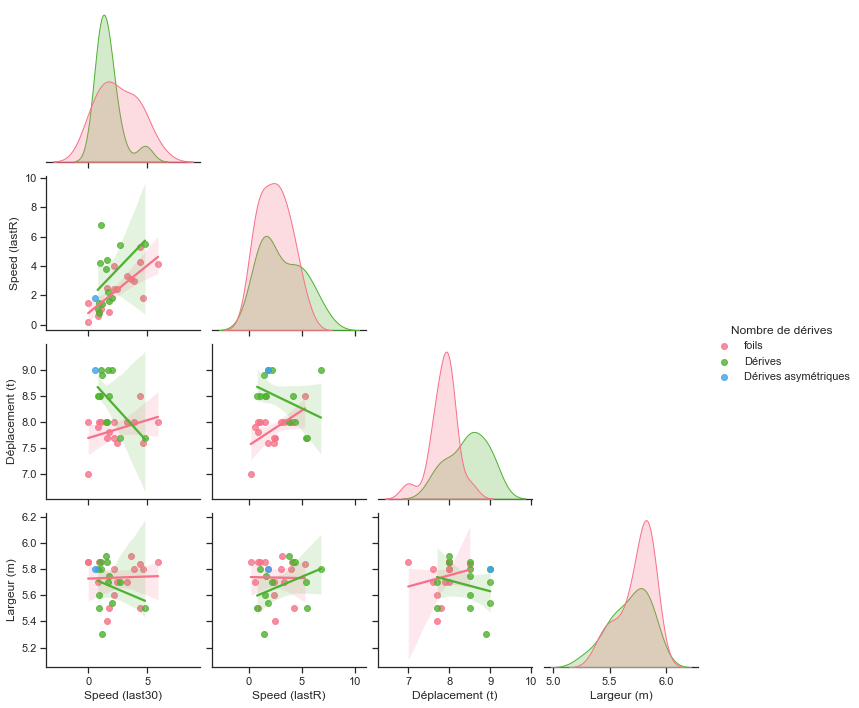

In [93]:
#Analyse low level des corrélations rang - vitesse
Corr=vg_boat.groupby('Skipper').agg({'Speed (last30)':'min','Speed (lastR)':'min',\
                                    'Déplacement (t)':'first','Largeur (m)':'first',
                                    'Nombre de dérives':'first'})

fig = plt.figure(figsize=(10, 5))
sns.pairplot(Corr,diag_kind="kde",hue='Nombre de dérives',kind="reg",palette="husl",corner=True);
#hue='Nombre de dérives'
plt.show()

Le type de dérive ne semble pas affecter la vitesse minimale, qui semble équivalente dans tous les cas.
Pourtant les foils sont sensés être moins compétitids en cas de manque de vent. Ce graphe pourrait évoluerlors de la fin de course.

## Calcul des caractéristiques importances pour la vitesse

### Matrice de corrélation des features

In [94]:
#préparation des data
names_d=['Rank','VMG (lastR)','Date','Cap heading (lastR)','Crew',  'Distance(lastR)','Sail', 'latitude', 'longitude',
        'Cap heading (last30)','Speed (last30)', 'VMG (last30)',
       'Distance (last30)','DTF', 'DTL', 'Hour', 'Timezone',
       'Nationality', 'Architecte', 'Chantier', 'Date de lancement']
vg_boat_f = vg_boat_f.drop(names_d, axis=1)

In [95]:
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from scipy.linalg import pinv,inv

In [96]:
#Calcul de la matrice des corrélations entre les variables normalisées
vg_boat_fc=vg_boat_f.groupby('Skipper').agg('mean')
Y=vg_boat_fc.pop('Speed (lastR)')
X=vg_boat_fc.copy()
scaler_X_tr=preprocessing.StandardScaler(with_std=True).fit(X)
scaler_X_tr.transform(X)
COV_X=np.dot(scaler_X_tr.transform(X).T,scaler_X_tr.transform(X))/X.shape[0]
X_train_c=scaler_X_tr.transform(X).T

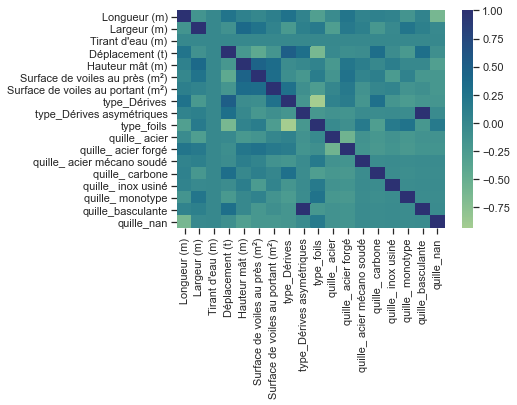

In [121]:
ax = sns.heatmap(COV_X,fmt="d",xticklabels=X.columns,yticklabels=X.columns,cmap='crest')

### Utilisation d'une technique de sélection de variables: Forward Variable Sélection

La technique était déja codée. L'idée est de déterminer qu'elles sont le svariables explicatives de X qui sont le plus corrélées à Y. Les résultats son à corréler avec d'autres techniques

In [122]:
#fonction pour le calcul de la méthode forward variable sélection
def Cal_opt_Tn(X,Y,k_l):
    Tn_ref=0
    k_ref=0
    res_ref=0
    for k in range(X.shape[1]):
        if k not in k_l:
            X_temp=X[X.columns[k]][:,np.newaxis]
            X_temp=sm.add_constant(X_temp)
            At=(pinv(X_temp.T.dot(X_temp)))
            Bt=np.dot(X_temp.T,Y)
            Thetas=np.dot(At,Bt)
            Gram=(X_temp.T.dot(X_temp))/X_temp.shape[0]
            Sn2=pinv(Gram)[1-X_temp.shape[1],1-X_temp.shape[1]]
            Theta=Thetas[1-X_temp.shape[1]]
            Y_pred=np.dot(X_temp,Thetas)
            Var2_n=1/(X_temp.shape[0]-X_temp.shape[1])*((Y-Y_pred)**2).sum()
            Tn=abs(Theta)/(np.sqrt(Sn2)*np.sqrt(Var2_n))
            res=Y-Y_pred
            if Tn>Tn_ref:
                k_ref=k
                Tn_ref=Tn
                res_ref=res
    return k_ref,res_ref

##### Analyse 1 : prise en compte des variables catégoriales

In [123]:
Y=vg_boat_f.pop('Speed (lastR)')
X=vg_boat_f.copy()
X=X.drop(['Skipper','Année de lancement','Longueur (m)','Tirant d\'eau (m)'], axis=1)
#Calcul des variables sélectionnées par FVS
X_l=X
R_l=Y
k_res=[]
resm=[]
nb=X.shape[1]
for i in range(X_l.shape[1]):
    k,Residu=Cal_opt_Tn(X_l,R_l,k_res)
    k_res.append(k)
    R_l=Residu
    resm.append(R_l.mean())
print('Voici les {} premières caractéristiques explicatives d\'un bateau pour sa vitesse'.format(nb))
for i in range(nb):
    print(X.columns[k_res[i]])

Voici les 16 premières caractéristiques explicatives d'un bateau pour sa vitesse
Déplacement (t)
quille_ monotype
Largeur (m)
quille_ inox usiné
Surface de voiles au près (m²)
Hauteur mât (m)
quille_ acier mécano soudé
quille_ carbone
Surface de voiles au portant (m²)
quille_ acier forgé
type_Dérives
quille_nan
type_Dérives asymétriques
quille_ acier
type_foils
quille_basculante


Etonnement la caractéristique foil n\'apparait pas dans les premières variables explicatives de la vitesse moyenne.
Il est probable que comme elle affecte le déplacement son influence est à prendre en compte dans la variables aléatoire "déplacement".

##### Analyse 2 : sans les variables catégoriales

In [124]:
names_d=['type_Dérives',
'type_Dérives asymétriques', 'type_foils', 'quille_ acier',
       'quille_ acier forgé', 'quille_ acier mécano soudé', 'quille_ carbone',
       'quille_ inox usiné', 'quille_ monotype', 'quille_basculante',
       'quille_nan']
X2=X.drop(names_d, axis=1)
#Calcul des variables sélectionnées par FVS
X_l=X2
R_l=Y
k_res=[]
resm=[]
nb=X_l.shape[1]
for i in range(X_l.shape[1]):
    k,Residu=Cal_opt_Tn(X_l,R_l,k_res)
    k_res.append(k)
    R_l=Residu
    resm.append(R_l.mean())
print('Voici les {} premières caractéristiques explicatives d\'un bateau pour sa vitesse'.format(nb))
for i in range(nb):
    print(X2.columns[k_res[i]])

Voici les 5 premières caractéristiques explicatives d'un bateau pour sa vitesse
Déplacement (t)
Largeur (m)
Surface de voiles au près (m²)
Hauteur mât (m)
Surface de voiles au portant (m²)


Dans ce cas ci nous les variables catégorielles type dérives et quilles ont été supprimées.
Globalement on retrouve bien les informations affichées plus tot. On se rend compte que le déplacement semble être essentiel à la vitesse moyenne d'un bateau. 

### Utilisation d'une technique de sélection de variables: LASSO

In [125]:
from sklearn.linear_model import LassoCV
Lasso = LassoCV(n_alphas=1000,cv=5,fit_intercept=True, normalize=False)
Lasso.fit(X, Y)
print('Nombre de coefficents du lasso différent de zéro parmi {} features : {} '.format(X.shape[1],(Lasso.coef_!=0).sum()))
result = np.where((Lasso.coef_!=0) == True)
print('Coefficients choisis par LASSO : ')
for i in range(len(result[0])):
    print(X.columns[result[0][i]])

Nombre de coefficents du lasso différent de zéro parmi 16 features : 6 
Coefficients choisis par LASSO : 
Déplacement (t)
Surface de voiles au près (m²)
Surface de voiles au portant (m²)
type_foils
quille_ carbone
quille_ monotype


Les résultats de la technique LASSO sont intérressants. Parmi toutes les variables explicatives (à l'exception des constantes longueur et largeur qui ont été supprimées) nous retrouvons celles qui me semblent importantes pour la vitesse moyenne d'un bateau (Déplacement, surfaces des voiles et foils)

### Utilisation d'une technique de sélection de variables: RandomForest

In [126]:
from sklearn.ensemble import RandomForestRegressor

Feature: Déplacement (t), Score: 0.46316800828611077)
Feature: Surface de voiles au près (m²), Score: 0.16327325088212385)
Feature: Surface de voiles au portant (m²), Score: 0.12806795553967698)
Feature: Largeur (m), Score: 0.12358952198433774)
Feature: quille_ acier forgé, Score: 0.06610266010478325)
Feature: quille_ monotype, Score: 0.01514002719115433)
Feature: quille_ acier, Score: 0.012426482329504456)
Feature: type_foils, Score: 0.008013932766232109)
Feature: Hauteur mât (m), Score: 0.006362002802319265)
Feature: type_Dérives, Score: 0.006322329358943692)
Feature: quille_ inox usiné, Score: 0.002968491792484913)
Feature: quille_ carbone, Score: 0.0019074076200617728)
Feature: quille_nan, Score: 0.0016720956408695455)
Feature: quille_ acier mécano soudé, Score: 0.00042669525770197504)
Feature: type_Dérives asymétriques, Score: 0.00031252330221120733)
Feature: quille_basculante, Score: 0.00024661514148411516)


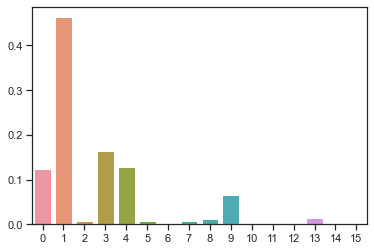

In [127]:
# Modèle et fit
model = RandomForestRegressor()
model.fit(X, Y)
# calcul des variables
importance = model.feature_importances_
idx=importance.argsort()[::-1]
# Affichage:
for i in range(len(idx)):
    print('Feature: {}, Score: {})'.format(X.columns[idx[i]],importance[idx[i]]))
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

Cette technique donnent des résultats similaires à celle de Forward Variable Sélection. Les variables importantes sont donc le déplacement, les surfaces des voiles (celle au près principalement)et la largeur. L'influence Foils/ Dérive n'apparait que plus bas. Les résulats du modèle Lasso semblait plus adaptés.